In [1]:
from rdkit import Chem
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

import src.utils as utils
from src.featurizers import ECFPFeaturizer
from src.splitters import ScaffoldSplitter


seed = 1

Skipped loading some Tensorflow models, missing a dependency. No module named 'tensorflow'
Skipped loading modules with transformers dependency. No module named 'transformers'
cannot import name 'HuggingFaceModel' from 'deepchem.models.torch_models' (c:\Users\kamil\anaconda3\envs\ml_gnn\lib\site-packages\deepchem\models\torch_models\__init__.py)
Skipped loading modules with pytorch-lightning dependency, missing a dependency. No module named 'lightning'
Skipped loading some Jax models, missing a dependency. No module named 'jax'
Skipped loading some PyTorch models, missing a dependency. No module named 'tensorflow'


In [2]:
datasets = utils.load_data()
target_fields = utils.get_data_target_field_names()

data, y_col = datasets[0], target_fields[0]

fp_size = 2048
fp_radius = 2
featurizer = ECFPFeaturizer(y_col, length=fp_size, radius=fp_radius, log_target_transform=False)
X, y = featurizer(data)

In [3]:
data_smiles = [Chem.MolToSmiles(mol) for mol in data]
scaffold_splitter = ScaffoldSplitter()
X_train, X_test, y_train, y_test = scaffold_splitter.train_test_split(X, y, data_smiles)

In [7]:
model = DecisionTreeRegressor(max_depth=4, min_samples_leaf=2, min_samples_split=50,
                               random_state=seed)
model.fit(X_train, y_train)
model.score(X_train, y_train), model.score(X_test, y_test), mean_squared_error(y_test, model.predict(X_test))

(0.4777299102124263, 0.5353142266453194, 2216.5482474457353)

In [5]:
utils.save_decision_tree_graph(model, "tree.png")

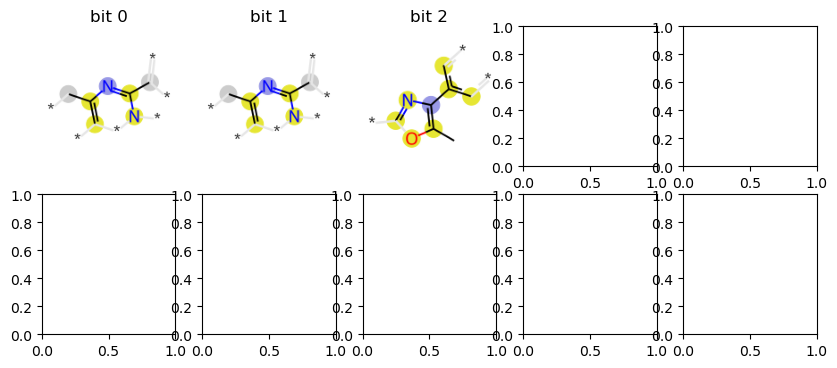

In [13]:
utils.draw_morgan_bit_many_molecules(data, 85, fp_radius, fp_size)